 
You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

Data Ingestion: 12 marks
1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)
2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 5 marks
1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

Modelling: 26 marks
1. Apply Logistic Regression and LDA (linear discriminant analysis). (5 marks)
2. Apply KNN Model and Naïve Bayes Model. Interpret the results. (7 marks)
3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. (7 marks)
4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


Inference: 5 marks
1. Based on these predictions, what are the insights? (5 marks)

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# For preprocessing the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve, auc

import warnings 
warnings.filterwarnings( "ignore")

In [2]:
df=pd.read_excel("C:\DATA file\Election_Data.xlsx")
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [3]:
# drop the Unnamed:0 column 

df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
# shape of dataframe 
print('No of columns:',df.shape[1],'\n' 'No of rows:',df.shape[0])

No of columns: 9 
No of rows: 1525


In [5]:
# Types of data (variables)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
# Test whether there is any null value 
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

There is no null value in data set 

In [7]:
# remove the duplicates 
df=df.drop_duplicates()

In [8]:
df.shape

(1517, 9)

In [9]:
cat=['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']
for i in cat:
    df[i]=df[i].astype("object")

In [10]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
['age']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   object
 3   economic.cond.household  1517 non-null   object
 4   Blair                    1517 non-null   object
 5   Hague                    1517 non-null   object
 6   Europe                   1517 non-null   object
 7   political.knowledge      1517 non-null   object
 8   gender                   1517 non-null   object
dtypes: int64(1), object(8)
memory usage: 118.5+ KB


# Describe for numerical and categorical columns

In [12]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0


In [13]:
df[cat].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
economic.cond.national,1517,5,3,604
economic.cond.household,1517,5,3,645
Blair,1517,5,4,833
Hague,1517,5,2,617
Europe,1517,11,11,338
political.knowledge,1517,4,2,776
gender,1517,2,female,808


# unique values for categorical variables

In [14]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




# Univariate Analysis

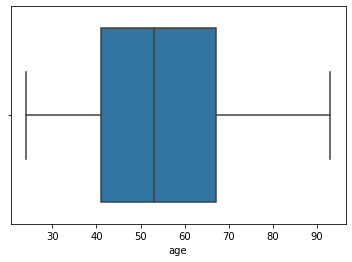

In [15]:
# check outlier in data 
sns.boxplot(df['age'])
plt.show()

there is no outlier in the data set 

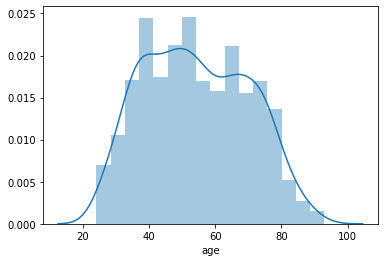

In [16]:
sns.distplot(df['age'])
plt.show()

In [17]:
print('Kurtosis of age:',df['age'].kurt())

Kurtosis of age: -0.943707667905203


categories present in vote-


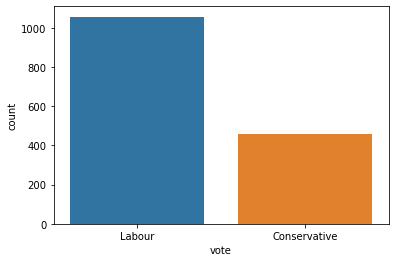

categories present in economic.cond.national-


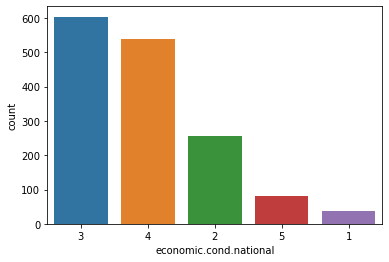

categories present in economic.cond.household-


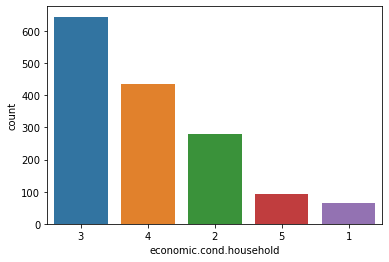

categories present in Blair-


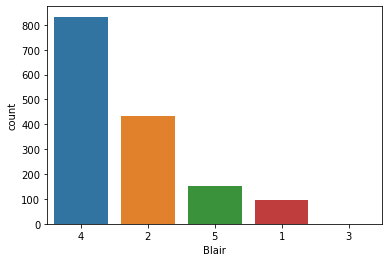

categories present in Hague-


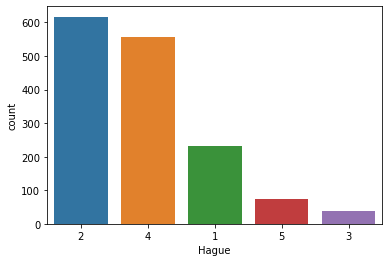

categories present in Europe-


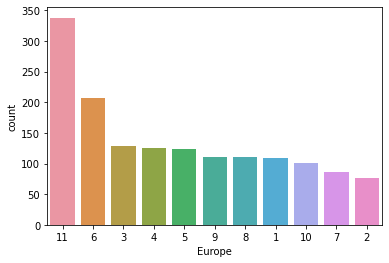

categories present in political.knowledge-


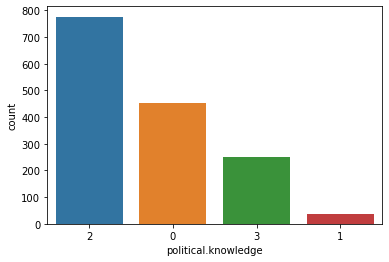

categories present in gender-


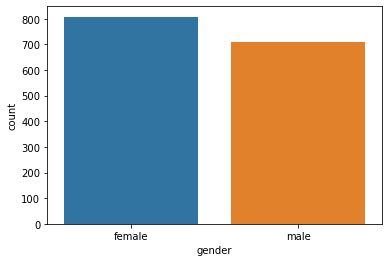

In [18]:
for i in df.columns:
    if i !='age':
        print('categories present in {}-'.format(i))
        sns.countplot(df[i],data=df,order=df[i].value_counts().index)
        plt.show()
    


# Bivariate and Multivariate Analysis

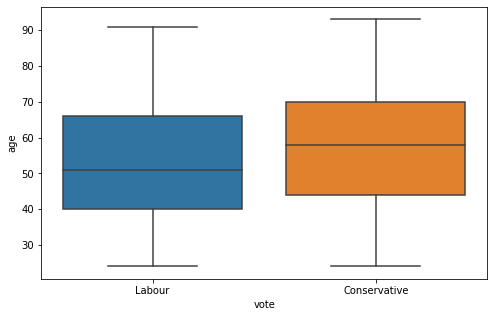

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["vote"], y=df['age']) 
plt.show()

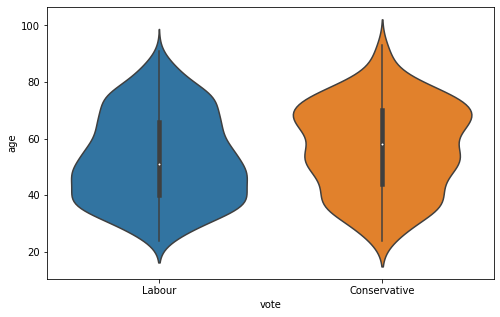

In [20]:
plt.figure(figsize=(8,5))
sns.violinplot(x=df["vote"], y=df['age']) 
plt.show()

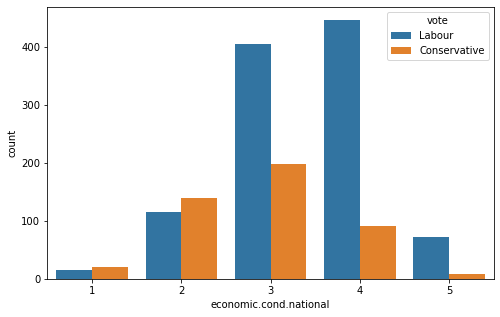

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(hue=df["vote"], x=df['economic.cond.national']) 
plt.show()


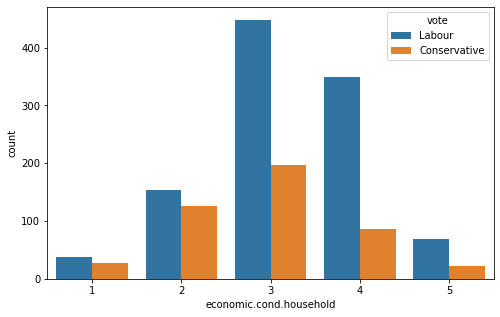

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(hue=df["vote"], x=df['economic.cond.household']) 
plt.show()

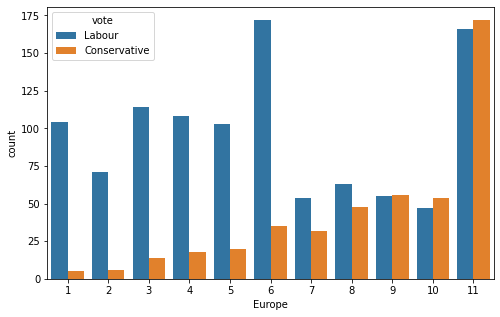

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(hue=df["vote"], x=df['Europe']) 
plt.show()

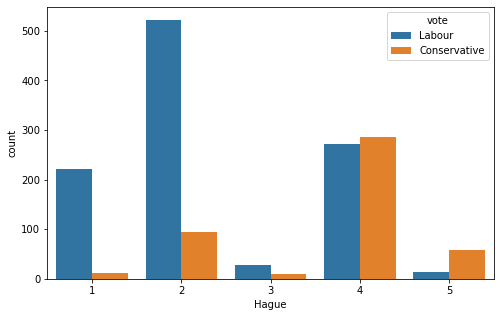

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(hue=df["vote"], x=df['Hague']) 
plt.show()

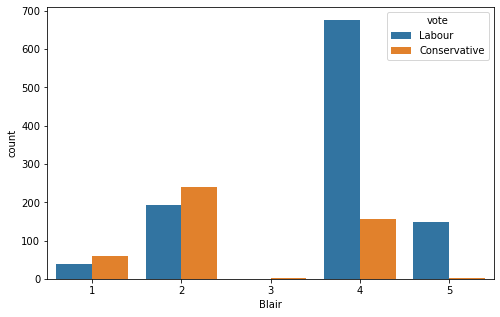

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(hue=df["vote"], x=df['Blair']) 
plt.show()


# Splitting the data into train _test 

In [26]:
y=df['vote']
df=df.drop('vote',axis=1)

# Encoding 'gender' variable 

In [27]:
df=pd.get_dummies(df,columns=['gender'],drop_first=True)
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [28]:
def func(a):
    dict_y={'Conservative':0,'Labour':1}
    return(dict_y[a])

In [29]:
y=y.apply(func)

In [30]:
y.value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [31]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [32]:
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=100,stratify=y)

In [33]:
# cecking the shape 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1061, 8), (456, 8), (1061,), (456,))

In [34]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
958,54,2,2,2,2,9,2,1
980,56,2,2,4,1,6,2,1
882,69,3,3,2,2,11,2,0
665,80,5,3,2,5,9,0,1
637,56,3,3,2,4,3,2,0


In [35]:
X_test.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1521,73,2,2,4,4,8,2,1
96,41,3,3,4,4,5,2,0
39,72,1,3,2,2,11,2,0
1088,76,4,4,5,2,1,0,0
447,40,4,4,4,4,1,0,1


# Modeling 

# KKN Model 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()


In [37]:
X_train_sc=pd.DataFrame(min_max.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(min_max.transform(X_test),columns=X_test.columns)

In [38]:
KNN_model=KNeighborsClassifier()

In [39]:
KNN_model.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [42]:
# Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train_sc)
model_score = KNN_model.score(X_train_sc, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8689915174363808
[[241  81]
 [ 58 681]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       322
           1       0.89      0.92      0.91       739

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061



In [43]:
# Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test_sc)
model_score = KNN_model.score(X_test_sc, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8070175438596491
[[ 99  39]
 [ 49 269]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       138
           1       0.87      0.85      0.86       318

    accuracy                           0.81       456
   macro avg       0.77      0.78      0.78       456
weighted avg       0.81      0.81      0.81       456



In [55]:
params={'n_neighbors':[5,6,7,8,9,10],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}

In [56]:
grid_knn=GridSearchCV(KNN_model,param_grid=params,refit=True,verbose=1)
grid_knn.fit(X_train_sc,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   10.7s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [57]:
# Performance Matrix on train data set
y_train_predict = grid_knn.predict(X_train_sc)
model_score = grid_knn.score(X_train_sc, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8586239396795476
[[242  80]
 [ 70 669]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       322
           1       0.89      0.91      0.90       739

    accuracy                           0.86      1061
   macro avg       0.83      0.83      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [58]:
# Performance Matrix on test data set
y_test_predict = grid_knn.predict(X_test_sc)
model_score = grid_knn.score(X_test_sc, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7982456140350878
[[ 99  39]
 [ 53 265]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       138
           1       0.87      0.83      0.85       318

    accuracy                           0.80       456
   macro avg       0.76      0.78      0.77       456
weighted avg       0.81      0.80      0.80       456



In [59]:
grid_knn.best_params_

{'algorithm': 'brute', 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}

# 1. Naive Bayes Model

In [62]:
from sklearn.naive_bayes import GaussianNB


In [63]:
NB_model = GaussianNB()
NB_model.fit(X_train_sc, y_train)

GaussianNB()

In [64]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train_sc)
model_score = NB_model.score(X_train_sc, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8360037700282752
[[225  97]
 [ 77 662]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       322
           1       0.87      0.90      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [65]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test_sc)
model_score = NB_model.score(X_test_sc, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[ 99  39]
 [ 43 275]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       138
           1       0.88      0.86      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test_sc)
model_score = NB_model.score(X_test_sc, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

# 2. SVM Model

In [70]:
svm_c=SVC(probability=True,kernel='linear',random_state=100)
svm_c.fit(X_train_sc,y_train)

SVC(kernel='linear', probability=True, random_state=100)

In [71]:
## Performance Matrix on train data set
y_train_predict = svm_c.predict(X_train_sc)
model_score = svm_c.score(X_train_sc, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8397737983034873
[[217 105]
 [ 65 674]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [72]:
## Performance Matrix on test data set
y_test_predict = svm_c.predict(X_test_sc)
model_score = svm_c.score(X_test_sc, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8179824561403509
[[ 95  43]
 [ 40 278]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       138
           1       0.87      0.87      0.87       318

    accuracy                           0.82       456
   macro avg       0.78      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



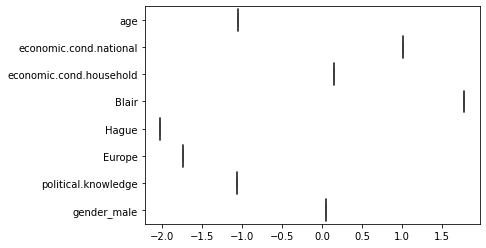

In [86]:
# Coefficient Values 
sns.boxplot(x=[i for i in svm_c.coef_[0]],y=X_train.columns)
plt.show()

In [94]:
parameters={'kernel':['linear','rbf','poly'],'C':np.logspace(-3,2,10),'gamma':[0.2,0.3,0.4,0.5,0.6],'degree':[2,3],'random_state':[100]}

In [95]:
grid_2=GridSearchCV(SVC(probability=True),param_grid=parameters,refit=True,verbose=1)
grid_2.fit(X_train_sc,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  3.0min finished


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                         'degree': [2, 3], 'gamma': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'random_state': [100]},
             verbose=1)

In [96]:
grid_2.best_params_

{'C': 7.742636826811277,
 'degree': 2,
 'gamma': 0.3,
 'kernel': 'rbf',
 'random_state': 100}

In [97]:
## Performance Matrix on train data set
y_train_predict = grid_2.predict(X_train_sc)
model_score = grid_2.score(X_train_sc, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8623939679547596
[[229  93]
 [ 53 686]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       322
           1       0.88      0.93      0.90       739

    accuracy                           0.86      1061
   macro avg       0.85      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [98]:
## Performance Matrix on test data set
y_test_predict = grid_2.predict(X_test_sc)
model_score = grid_2.score(X_test_sc, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[ 96  42]
 [ 38 280]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       138
           1       0.87      0.88      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



# 3. Logistic Regression 

In [75]:
 
Log_r= LogisticRegression()
Log_r.fit(X_train, y_train)
y_predict = Log_r.predict(X_test)

In [76]:
# Performance Matrix on train data set
y_train_predict = Log_r.predict(X_train)
model_score = Log_r.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8416588124410933
[[217 105]
 [ 63 676]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [77]:
# Performance Matrix on test data set
y_test_predict = Log_r.predict(X_test)
model_score = Log_r.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[ 95  43]
 [ 37 281]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       138
           1       0.87      0.88      0.88       318

    accuracy                           0.82       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



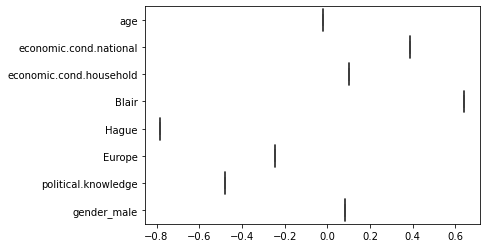

In [78]:
# Coefficient Values 
sns.boxplot(x=[i for i in Log_r.coef_[0]],y=X_train.columns)
plt.show()

In [79]:
lr_probs=Log_r.predict_proba(X_test)
lr_probs=lr_probs[:,1]
lr_auc=roc_auc_score(y_test,lr_probs)
print('Logistic:ROC_AUC=%0.3f'% (lr_auc))

lr_fpr,lr_tpr,_=roc_curve(y_test,lr_probs)

Logistic:ROC_AUC=0.884


# 4.Discriminant Analysis (LDA)

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [81]:

y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8416588124410933
[[220 102]
 [ 66 673]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [82]:
# Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[ 94  44]
 [ 38 280]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       138
           1       0.86      0.88      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



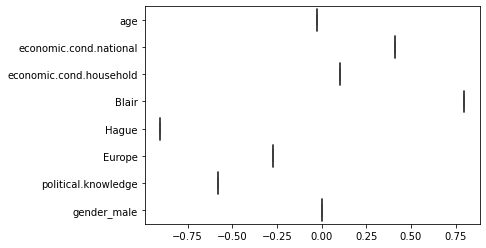

In [83]:
# Coefficient Values 
sns.boxplot(x=[i for i in LDA_model.coef_[0]],y=X_train.columns)
plt.show()

# 5. Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(random_state=1)
RF_model.fit(X_train_sc, y_train)

RandomForestClassifier(random_state=1)

In [109]:
# Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train_sc)
model_score =RF_model.score(X_train_sc, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990574929311969
[[322   0]
 [  1 738]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [110]:

# Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test_sc)
model_score = RF_model.score(X_test_sc, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8114035087719298
[[ 93  45]
 [ 41 277]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       138
           1       0.86      0.87      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.77      0.77       456
weighted avg       0.81      0.81      0.81       456



In [111]:
RF_model.feature_importances_

array([0.20218998, 0.08538708, 0.07329747, 0.14298398, 0.16546707,
       0.20030307, 0.09612995, 0.03424138])

In [112]:
param_rf={'max_depth':[5,6,7,8,9,10],'min_samples_split':[8,9,10],'n_estimators':[100,200,300],'criterion':['gini','entropy'],'random_state':[100]}

In [113]:
param_rf

{'max_depth': [5, 6, 7, 8, 9, 10],
 'min_samples_split': [8, 9, 10],
 'n_estimators': [100, 200, 300],
 'criterion': ['gini', 'entropy'],
 'random_state': [100]}

In [117]:
grid_rf=GridSearchCV(RandomForestClassifier(),param_grid=param_rf,refit=True,verbose=1)
grid_rf.fit(X_train_sc,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  4.9min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [8, 9, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [100]},
             verbose=1)

In [119]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_split': 10,
 'n_estimators': 200,
 'random_state': 100}

In [120]:
# Performance Matrix on train data set
y_train_predict =grid_rf.predict(X_train_sc)
model_score =grid_rf.score(X_train_sc, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.882186616399623
[[229  93]
 [ 32 707]]
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       322
           1       0.88      0.96      0.92       739

    accuracy                           0.88      1061
   macro avg       0.88      0.83      0.85      1061
weighted avg       0.88      0.88      0.88      1061



In [121]:
# Performance Matrix on test data set
y_test_predict = grid_rf.predict(X_test_sc)
model_score = grid_rf.score(X_test_sc, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[ 93  45]
 [ 33 285]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       138
           1       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.83      0.83      0.83       456



# Bagging

In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



In [101]:
bag=BaggingClassifier()
bag.fit(X_train_sc, y_train)

BaggingClassifier()

In [102]:
# Performance Matrix on train data set
y_train_predict = bag.predict(X_train_sc)
model_score =bag.score(X_train_sc, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9802073515551367
[[315   7]
 [ 14 725]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       322
           1       0.99      0.98      0.99       739

    accuracy                           0.98      1061
   macro avg       0.97      0.98      0.98      1061
weighted avg       0.98      0.98      0.98      1061



In [107]:
# Performance Matrix on test data set
y_test_predict = bag.predict(X_test_sc)
model_score = bag.score(X_test_sc, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7828947368421053
[[ 87  51]
 [ 48 270]]
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       138
           1       0.84      0.85      0.85       318

    accuracy                           0.78       456
   macro avg       0.74      0.74      0.74       456
weighted avg       0.78      0.78      0.78       456



# Boosting Classification 

In [123]:
 from sklearn.ensemble import GradientBoostingClassifier

In [128]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train_sc, y_train)

GradientBoostingClassifier()

In [129]:
# Performance Matrix on train data set
y_train_predict = gbc.predict(X_train_sc)
model_score =gbc.score(X_train_sc, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8972667295004713
[[249  73]
 [ 36 703]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       322
           1       0.91      0.95      0.93       739

    accuracy                           0.90      1061
   macro avg       0.89      0.86      0.87      1061
weighted avg       0.90      0.90      0.90      1061



In [130]:
# Performance Matrix on test data set
y_test_predict = gbc.predict(X_test_sc)
model_score = gbc.score(X_test_sc, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[ 90  48]
 [ 37 281]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       138
           1       0.85      0.88      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.77      0.77       456
weighted avg       0.81      0.81      0.81       456



# Hyperparameter 

In [131]:
param_gbc={'learning_rate':[0.05,0.075,0.1,0.2],'max_depth':[5,6,7,8],'min_samples_split':[5,6,7,8,9,10],'n_estimators':[50,75],'random_state':[100]}

In [132]:
grid_gbc=GridSearchCV(GradientBoostingClassifier(),param_grid=param_gbc,refit=True,verbose=1)
grid_gbc.fit(X_train_sc,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  5.2min finished


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.2],
                         'max_depth': [5, 6, 7, 8],
                         'min_samples_split': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 75], 'random_state': [100]},
             verbose=1)

In [133]:
grid_gbc.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_samples_split': 10,
 'n_estimators': 75,
 'random_state': 100}

In [134]:
# Performance Matrix on train data set
y_train_predict = grid_gbc.predict(X_train_sc)
model_score =grid_gbc.score(X_train_sc, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9293119698397738
[[268  54]
 [ 21 718]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       322
           1       0.93      0.97      0.95       739

    accuracy                           0.93      1061
   macro avg       0.93      0.90      0.91      1061
weighted avg       0.93      0.93      0.93      1061



In [135]:
# Performance Matrix on test data set
y_test_predict = grid_gbc.predict(X_test_sc)
model_score = grid_gbc.score(X_test_sc, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8026315789473685
[[ 88  50]
 [ 40 278]]
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       138
           1       0.85      0.87      0.86       318

    accuracy                           0.80       456
   macro avg       0.77      0.76      0.76       456
weighted avg       0.80      0.80      0.80       456



All the models  have almost same performance but its depend on the business objective !!!!